## Implementação do algoritmo desenvolvido por Dhaiane Mendes Silva

**Data:** 21/01/2021

**Etapas**

- Imagem original (com artefato)
- Sinograma da Imagem
- Detecção do metal
- Sinograma do metal
- Subtração do metal
- Sinograma dos artefatos
- Subtração dos artefatos
- Interpolação

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from collections import Counter
from skimage.transform import radon, iradon

### 1. Imagem original

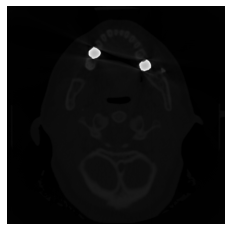

In [2]:
original_img = np.load('data_with_metal.npy')

# plt.imshow(image_orig, cmap = 'gray', vmin = 0, vmax = 255)
plt.imshow(original_img, cmap = 'gray')
plt.axis('off')
plt.savefig("original_image.png")

### 2. Sinograma da Imagem Original

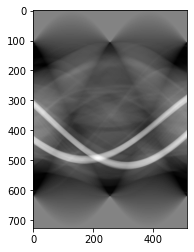

In [4]:
theta = np.linspace(0, 180, max(original_img.shape))
original_sin =  radon(original_img, theta=theta, circle=False)

plt.imshow(original_sin, cmap = 'gray')

### 3. Detecção do metal

### 3.1. Utilizando *Threshold* e escalonamento

In [5]:
print(original_sin.max(), original_sin.min())

scaled_sin = np.copy(original_sin)
print(scaled_sin.max(), scaled_sin.min())

450157.2621653521 -476707.35418765264
450157.2621653521 -476707.35418765264


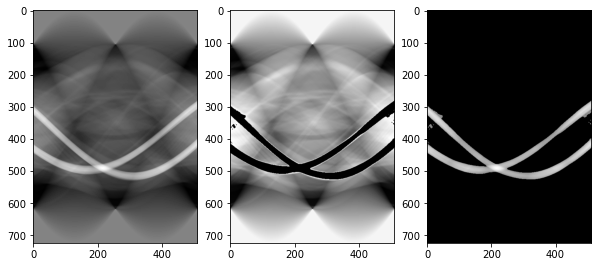

In [6]:
threshold = 20000
filtered_scaled_sin = np.copy(scaled_sin)
filtered_scaled_sin[scaled_sin > threshold] = scaled_sin.min()
metal_sin = np.copy(np.subtract(scaled_sin, filtered_scaled_sin))

fig, axs = plt.subplots(1, 3, figsize = [10, 10])
axs[0].imshow(scaled_sin, cmap = 'gray')
axs[1].imshow(filtered_scaled_sin, cmap = 'gray')
axs[2].imshow(metal_sin, cmap = 'gray')

In [7]:
original_img.max()

17535.771562888578

Text(0.5, 1.0, 'Metal')

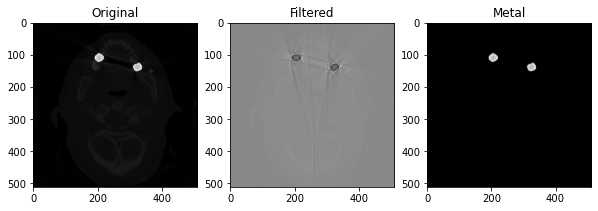

In [8]:
filtered_scaled_img = iradon(filtered_scaled_sin, theta = theta, circle=False)
# metal_img = iradon(metal_sin, theta = theta, circle=False)
metal_img = np.zeros(original_img.shape)
metal_img = np.copy(original_img)
metal_img[original_img < 3000] = 0

metal_sin = radon(metal_img, theta = theta, circle=False)

fig, axs = plt.subplots(1, 3, figsize = [10, 10])
# np.mean(artifacts_img)
axs[0].imshow(original_img, cmap = 'gray')
axs[1].imshow(filtered_scaled_img, cmap = 'gray')
axs[2].imshow(metal_img, cmap = 'gray')

axs[0].set_title('Original')
axs[1].set_title('Filtered')
axs[2].set_title('Metal')

Text(0.5, 1.0, 'Sinogram')

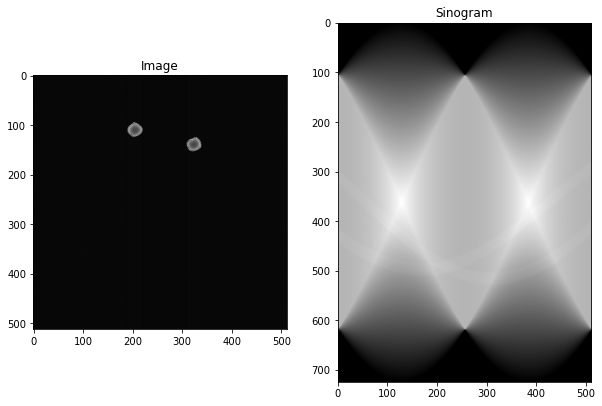

In [9]:
rec_metal_img = iradon(metal_sin, theta = theta, circle=False) 
# rec_metal_img[rec_metal_img != rec_metal_img.max()] += rec_metal_img.max() 
rec_metal_img[rec_metal_img < 10000] += 10000

fig, axs = plt.subplots(1, 2, figsize = [10, 10])
# np.mean(artifacts_img)
axs[0].imshow(rec_metal_img, cmap = 'gray')
axs[1].imshow(radon(rec_metal_img, theta=theta, circle=False), cmap = 'gray')

axs[0].set_title('Image')
axs[1].set_title('Sinogram')

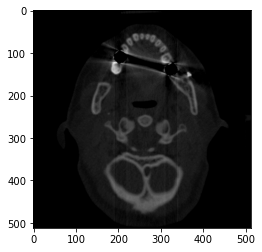

In [60]:
# Scalling
rec_metal_img256 = ((rec_metal_img - rec_metal_img.min()) * 255 / (rec_metal_img.max() - rec_metal_img.min()))
original_img256 = ((original_img - original_img.min()) * 255 / (original_img.max() - original_img.min()))
metal_img256 = ((metal_img - metal_img.min()) * 255 / (metal_img.max() - metal_img.min()))

sub_img = np.subtract(original_img256, rec_metal_img256)
sub_img = np.subtract(sub_img, metal_img256)

sub_img[sub_img < 0] = 0
sub_img = sub_img.astype(np.uint8)
plt.imshow(np.abs(sub_img), cmap = "gray")

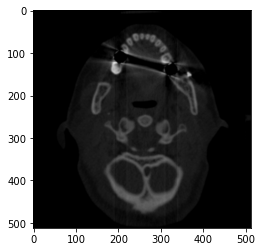

In [93]:
sub_img = np.abs(sub_img)
plt.imshow(sub_img, cmap = "gray", interpolation='gaussian')

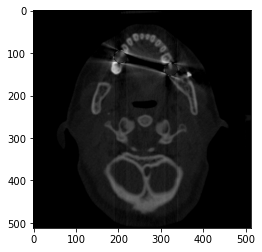

In [118]:
mask = np.copy(metal_img256)
# mask[mask > 0] = 255
mask[mask <= 0] = 0
mask = mask.astype(np.uint8)
final_img = cv.inpaint(sub_img, mask, 5, cv.INPAINT_TELEA) 
plt.imshow(final_img, cmap = 'gray')

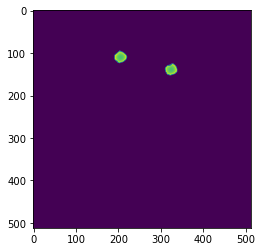

In [115]:
plt.imshow(metal_img256)

In [2]:
import numpy as np
from PIL import Image
import os

abs_path = os.path.abspath('')
img_path = "test4.png";
img_file = img_path.split("/")[len(img_path.split("/")) - 1]
img_path = img_path[0:len(img_path) - len(img_file)]
print(os.path.abspath(''))

if(len(img_path) > 0):
    os.chdir(img_path)
print(os.path.abspath(''))
print(img_path)
print(img_file)
os.chdir(abs_path)

/home/bruna/Documents/UnB/TCC/tcc_bruna_gabriel/Codigos/3_reducao_de_artefatos_metalicos
/home/bruna/Documents/UnB/TCC/tcc_bruna_gabriel/Codigos/3_reducao_de_artefatos_metalicos

test4.png


In [9]:
os.chdir(abs_path)